In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import scipy.special as scispec

In [2]:
plt_style_dir = '../../stash/'

In [3]:
if os.path.isdir(plt_style_dir) == True:
    plt.style.use(plt_style_dir + 'ppt2latexsubfig.mplstyle')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.titlesize'] = 40
#plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

## Gaussian TEM00 beam

In [4]:
lambd = 1064e-9                              # wavelength [m] 
k_ = 2*np.pi/lambd                           # wavenumber [1/m]
W_0 = 250e-6                                 # np.sqrt(lambd*z_0/np.pi) # beam radius [m]
z_0 = (W_0**2 * np.pi)/ lambd                # Rayleigh range [m]
W_z = lambda z : W_0*np.sqrt(1 + (z/z_0)**2) # Beam radius [m]
zeta = lambda z : np.arctan(z/z_0)           # gouy phase [arb]
ROC_z = lambda z : z*(1 + (z_0/z)**2)

## Building exponential terms for meshgrid
r_sqrd = lambda x , y : x**2 + y**2
gauexp = lambda a , b : np.exp(- a / b)

In [5]:
vprtsize = 10*W_0                             # Viewport width [m]
x = np.arange(-vprtsize/2,vprtsize/2, 1e-6)
y = x

In [6]:
z = z_0                                    # cross section slice along propogation axis
E_0 = 1
z_const = E_0*(W_0/W_z(z))*np.exp(-1j*(k_*z - zeta(z)))

In [7]:
X , Y = np.meshgrid(x,y)

In [8]:
exp1 = gauexp(r_sqrd(X,Y), (W_z(z))**2)
exp2 = gauexp(1j*k_*r_sqrd(X,Y), 2*ROC_z(z))

In [9]:
gauss_field = z_const*exp1*exp2

In [10]:
mode_prof = lambda field : np.abs(field*np.conj(field))

In [11]:
gauss_prof = np.abs(gauss_field*np.conj(gauss_field))

In [12]:
gauss_prof

array([[9.64374924e-23, 1.00371575e-22, 1.04462803e-22, ...,
        1.08717313e-22, 1.04462803e-22, 1.00371575e-22],
       [1.00371575e-22, 1.04466145e-22, 1.08724271e-22, ...,
        1.13152340e-22, 1.08724271e-22, 1.04466145e-22],
       [1.04462803e-22, 1.08724271e-22, 1.13155961e-22, ...,
        1.17764522e-22, 1.13155961e-22, 1.08724271e-22],
       ...,
       [1.08717313e-22, 1.13152340e-22, 1.17764522e-22, ...,
        1.22560778e-22, 1.17764522e-22, 1.13152340e-22],
       [1.04462803e-22, 1.08724271e-22, 1.13155961e-22, ...,
        1.17764522e-22, 1.13155961e-22, 1.08724271e-22],
       [1.00371575e-22, 1.04466145e-22, 1.08724271e-22, ...,
        1.13152340e-22, 1.08724271e-22, 1.04466145e-22]])

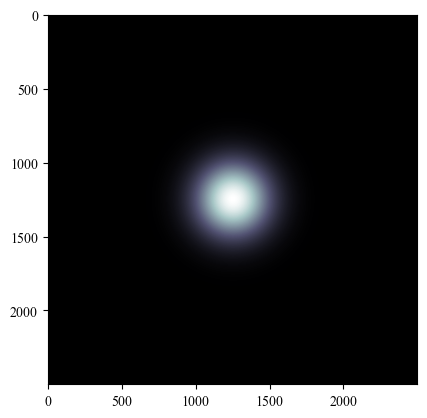

In [13]:
plt.imshow(mode_prof(gauss_field), vmin=0, vmax=mode_prof(gauss_field).max(), cmap='bone')

# Plotting Hermite-Gauss beam profiles

### Establish HG basis

In [14]:
scispec.hermite?

Signature: scispec.hermite(n, monic=False)
Docstring:
Physicist's Hermite polynomial.

Defined by

.. math::

    H_n(x) = (-1)^ne^{x^2}\frac{d^n}{dx^n}e^{-x^2};

:math:`H_n` is a polynomial of degree :math:`n`.

Parameters
----------
n : int
    Degree of the polynomial.
monic : bool, optional
    If `True`, scale the leading coefficient to be 1. Default is
    `False`.

Returns
-------
H : orthopoly1d
    Hermite polynomial.

Notes
-----
The polynomials :math:`H_n` are orthogonal over :math:`(-\infty,
\infty)` with weight function :math:`e^{-x^2}`.

Examples
--------
>>> from scipy import special
>>> import matplotlib.pyplot as plt
>>> import numpy as np

>>> p_monic = special.hermite(3, monic=True)
>>> p_monic
poly1d([ 1. ,  0. , -1.5,  0. ])
>>> p_monic(1)
-0.49999999999999983
>>> x = np.linspace(-3, 3, 400)
>>> y = p_monic(x)
>>> plt.plot(x, y)
>>> plt.title("Monic Hermite polynomial of degree 3")
>>> plt.xlabel("x")
>>> plt.ylabel("H_3(x)")
>>> plt.show()
File:      ~/miniconda3/

In [15]:
HG_zconst = lambda n, m, z: z_const*np.exp(1j*(n+m)*zeta(z))
HG_poly= lambda n, m, x, y, W_z_ : (scispec.hermite(n)(np.sqrt(2)*x/W_z_))*(scispec.hermite(m)(np.sqrt(2)*y/(W_z_)))
HGnm_field = lambda n, m , X, Y, W_z_: HG_poly(n,m,X,Y,W_z_)*exp1*exp2*HG_zconst(n,m,z)

In [16]:
HG00 = HGnm_field(0, 0, X, Y, W_z(z))
HG10 = HGnm_field(1, 0, X, Y, W_z(z))
HG11 = HGnm_field(1, 1, X, Y, W_z(z))
HG20 = HGnm_field(2, 0, X, Y, W_z(z))
HG21 = HGnm_field(2, 1, X, Y, W_z(z))
HG22 = HGnm_field(2, 2, X, Y, W_z(z))

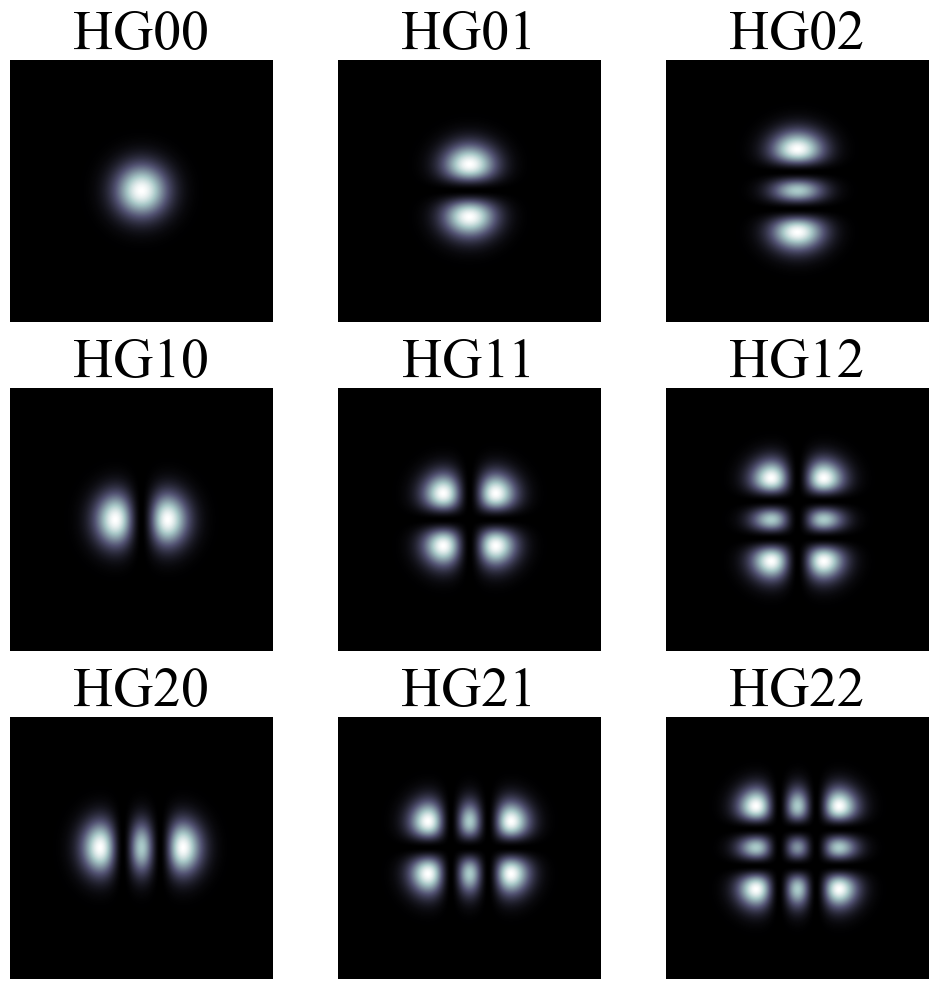

In [30]:
fig , axs = plt.subplots(3,3, figsize=(10,10))
axs[0, 0].imshow(mode_prof(HG00)/mode_prof(HG00).max(), vmin=0, vmax = 1, cmap='bone')
axs[0, 0].set_title("HG00")
axs[0, 0].axis("off")
axs[1, 0].imshow(mode_prof(HG10)/mode_prof(HG10).max(), vmin=0, vmax = 1, cmap='bone')
axs[1, 0].set_title("HG10")
axs[1, 0].sharex(axs[0, 0])
axs[1, 0].axis("off")
axs[0, 1].imshow(mode_prof(HG10).T/mode_prof(HG10).max(), vmin=0, vmax = 1, cmap='bone')
axs[0, 1].set_title("HG01")
axs[0, 1].axis("off")
axs[1, 1].imshow(mode_prof(HG11)/mode_prof(HG11).max(), vmin=0, vmax = 1, cmap='bone')
axs[1, 1].set_title("HG11")
axs[1, 1].axis("off")
axs[2, 0].imshow(mode_prof(HG20)/mode_prof(HG20).max(), vmin=0, vmax = 1, cmap='bone')
axs[2, 0].set_title("HG20")
axs[2, 0].sharex(axs[0, 0])
axs[2, 0].axis("off")
axs[0, 2].imshow(mode_prof(HG20).T/mode_prof(HG20).max(), vmin=0, vmax = 1, cmap='bone')
axs[0, 2].set_title("HG02")
axs[0, 2].axis("off")
axs[2, 1].imshow(mode_prof(HG21)/mode_prof(HG21).max(), vmin=0, vmax = 1, cmap='bone')
axs[2, 1].set_title("HG21")
axs[2, 1].sharex(axs[1, 1])
axs[2, 1].axis("off")
axs[1, 2].imshow(mode_prof(HG21).T/mode_prof(HG21).max(), vmin=0, vmax = 1, cmap='bone')
axs[1, 2].set_title("HG12")
axs[1, 2].axis("off")
axs[2, 2].imshow(mode_prof(HG22)/mode_prof(HG22).max(), vmin=0, vmax = 1, cmap='bone')
axs[2, 2].set_title("HG22")
axs[2, 2].axis("off")
fig.tight_layout()
plt.savefig('../../figs/INTRO/HG00_HG22_modes.pdf', dpi=300, bbox_inches='tight')

## Establish LG basis

In [18]:
scispec.genlaguerre?

Signature: scispec.genlaguerre(n, alpha, monic=False)
Docstring:
Generalized (associated) Laguerre polynomial.

Defined to be the solution of

.. math::
    x\frac{d^2}{dx^2}L_n^{(\alpha)}
      + (\alpha + 1 - x)\frac{d}{dx}L_n^{(\alpha)}
      + nL_n^{(\alpha)} = 0,

where :math:`\alpha > -1`; :math:`L_n^{(\alpha)}` is a polynomial
of degree :math:`n`.

Parameters
----------
n : int
    Degree of the polynomial.
alpha : float
    Parameter, must be greater than -1.
monic : bool, optional
    If `True`, scale the leading coefficient to be 1. Default is
    `False`.

Returns
-------
L : orthopoly1d
    Generalized Laguerre polynomial.

Notes
-----
For fixed :math:`\alpha`, the polynomials :math:`L_n^{(\alpha)}`
are orthogonal over :math:`[0, \infty)` with weight function
:math:`e^{-x}x^\alpha`.

The Laguerre polynomials are the special case where :math:`\alpha
= 0`.

See Also
--------
laguerre : Laguerre polynomial.
hyp1f1 : confluent hypergeometric function

References
----------
.. [

## Establish LG field form

In [19]:
PHI = np.arctan2(Y,X)

In [20]:
PHI

array([[-2.35619449, -2.35579433, -2.35539385, ..., -0.7865996 ,
        -0.7861988 , -0.78579832],
       [-2.35659465, -2.35619449, -2.35579401, ..., -0.78619945,
        -0.78579864, -0.78539816],
       [-2.35699513, -2.35659497, -2.35619449, ..., -0.78579896,
        -0.78539816, -0.78499768],
       ...,
       [ 2.35739593,  2.35699577,  2.35659529, ...,  0.78539816,
         0.78499736,  0.78459688],
       [ 2.35699513,  2.35659497,  2.35619449, ...,  0.78579896,
         0.78539816,  0.78499768],
       [ 2.35659465,  2.35619449,  2.35579401, ...,  0.78619945,
         0.78579864,  0.78539816]])

In [21]:
scispec.genlaguerre(0,0)(2.0*r_sqrd(X,Y)/(W_z(z)**2))

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [22]:
LG_zconst = lambda l, m, z: z_const*np.exp(1j*(l+2*m)*zeta(z))
LG_poly= lambda l, m, rho_sqr, W_z_ : scispec.genlaguerre(m,l)(2.0*rho_sqr/(W_z_**2))
LG_exp = lambda l , phi : np.exp(-1j*l*phi)
LGlm_field = lambda l, m , rho_sqr, phi, z, W_z_ : (((rho_sqr**.5)/W_z_)**l)*LG_poly(l,m,rho_sqr,W_z_)*exp1*exp2*LG_exp(l,phi)*LG_zconst(l,m,z)

In [23]:
LG_poly(1,0,r_sqrd(X,Y),W_z(z))

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [24]:
LG_norm = lambda l, m : np.sqrt(2*np.math.factorial(m)/(np.pi*np.math.factorial(m + l)))

In [25]:
LG00 = LGlm_field(0,0,r_sqrd(X,Y),PHI, z, W_z(z))
LG10 = LGlm_field(1,0,r_sqrd(X,Y),PHI, z, W_z(z))
LG01 = LGlm_field(0,1,r_sqrd(X,Y),PHI, z, W_z(z))
LG11 = LGlm_field(1,1,r_sqrd(X,Y),PHI, z, W_z(z))
LG20 = LGlm_field(2,0,r_sqrd(X,Y),PHI, z, W_z(z))
LG02 = LGlm_field(0,2,r_sqrd(X,Y),PHI, z, W_z(z))
LG12 = LGlm_field(1,2,r_sqrd(X,Y),PHI, z, W_z(z))
LG21 = LGlm_field(2,1,r_sqrd(X,Y),PHI, z, W_z(z))
LG22 = LGlm_field(2,2,r_sqrd(X,Y),PHI, z, W_z(z))

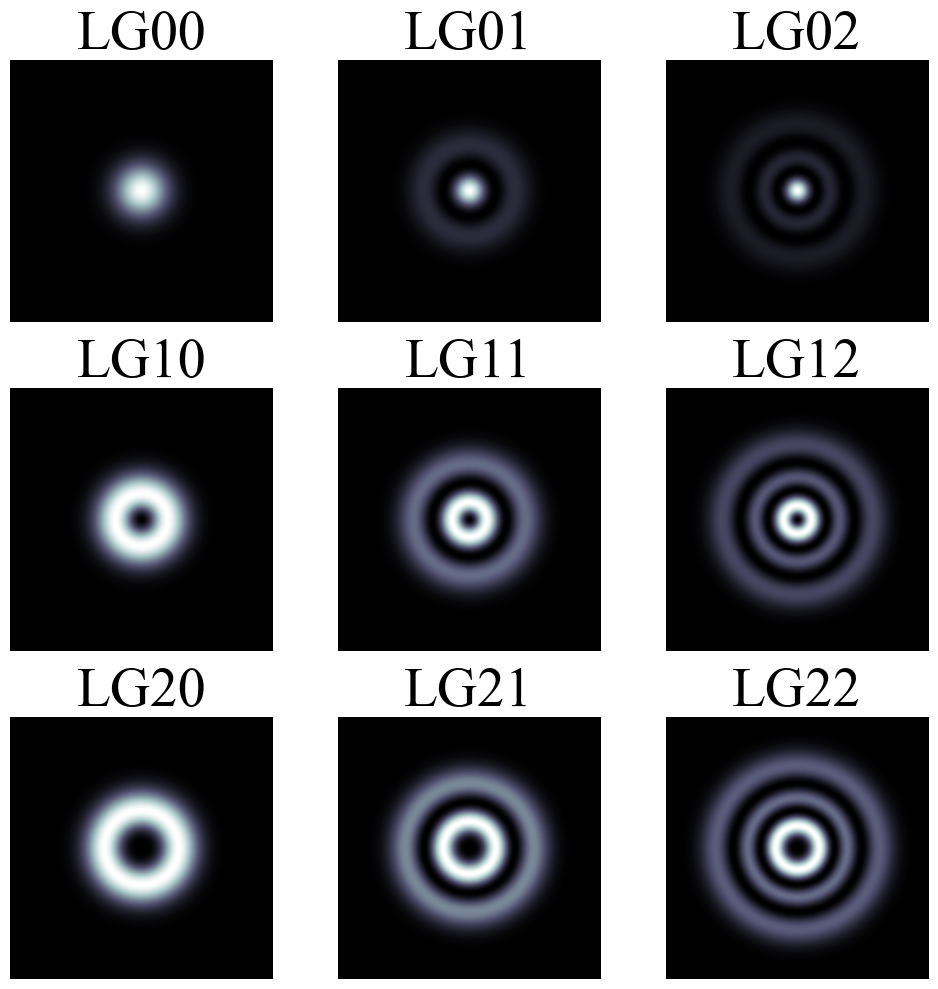

In [28]:
fig1 , axs1 = plt.subplots(3,3, figsize=(10,10))
axs1[0, 0].imshow(mode_prof(LG00), vmin=0, vmax= mode_prof(LG00).max(), cmap='bone')
axs1[0, 0].set_title("LG00")
axs1[0, 0].axis("off")
axs1[1, 0].imshow(mode_prof(LG10), vmin=0, vmax = mode_prof(LG10).max(), cmap='bone')
axs1[1, 0].set_title("LG10")
axs1[1, 0].sharex(axs1[0, 0])
axs1[1, 0].axis("off")
axs1[0, 1].imshow(mode_prof(LG01), vmin=0, vmax = mode_prof(LG01).max(), cmap='bone')
axs1[0, 1].set_title("LG01")
axs1[0, 1].axis("off")
axs1[1, 1].imshow(mode_prof(LG11), vmin=0, vmax = mode_prof(LG11).max(), cmap='bone')
axs1[1, 1].set_title("LG11")
axs1[1, 1].axis("off")
axs1[2, 0].imshow(mode_prof(LG20), vmin=0, vmax = mode_prof(LG20).max(), cmap='bone')
axs1[2, 0].set_title("LG20")
axs1[2, 0].sharex(axs1[0, 0])
axs1[2, 0].axis("off")
axs1[0, 2].imshow(mode_prof(LG02), vmin=0, vmax = mode_prof(LG02).max(), cmap='bone')
axs1[0, 2].set_title("LG02")
axs1[0, 2].axis("off")
axs1[2, 1].imshow(mode_prof(LG21), vmin=0, vmax = mode_prof(LG21).max(), cmap='bone')
axs1[2, 1].set_title("LG21")
axs1[2, 1].sharex(axs1[1, 1])
axs1[2, 1].axis("off")
axs1[1, 2].imshow(mode_prof(LG12), vmin=0, vmax = mode_prof(LG12).max(), cmap='bone')
axs1[1, 2].set_title("LG12")
axs1[1, 2].axis("off")
axs1[2, 2].imshow(mode_prof(LG22), vmin=0, vmax = mode_prof(LG22).max(), cmap='bone')
axs1[2, 2].set_title("LG22")
axs1[2, 2].axis("off")
fig1.tight_layout()
plt.savefig('../../figs/INTRO/LG00_LG22_modes.pdf', dpi=300, bbox_inches='tight')